# Tempo de Processamento dos Algoritmos de Beamforming 

Esse jupyter tem como objetivo usar as classes de simulação de array de microfones e bemaformers pra contar o tempo de processamento desses algoritmos em diferentes SNRs.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/home/dimi/Programming/IC2019/DOA/Python/")
from SimularArrayMicrofonesClass import SimularArrayMicrofones
from GeneralizedSidelobeCancellerClass import GeneralizedSidelobeCanceller

### Setando parâmetros iniciais e funções

In [2]:
# RESPEAKER INCLINADO
coordenadasMics = np.array([
    [0.0000, 0.00000, 0.00000],
    [0.0000, 0.04137, 0.04137],
    [0.0585, 0.04137, 0.04137],
    [0.0585, 0.00000, 0.00000]
])

In [3]:
def calcularEnerigaRuidoDadoSNR(snrDesejada, energiaSinal):
    return energiaSinal/(10**(snrDesejada/10))

### Começando

In [ ]:
# PARAMETROS INICIAIS
caminho   = "/home/dimi/Downloads/Datasets/SESA/SESA_Normalizado/test/"
rangeSNRs = np.arange(-10, 31, 5)

# CADA LINHA UM AUDIO E CADA COLUNA UMA SNR
matrizResultadosSemBeamforming = []
matrizResultadosDelaySum       = []
matrizResultadosGSC            = []

# PARA CADA ARQUIVO NA PASTA 
arrayArquivos = os.listdir(caminho)
for i, arquivo in enumerate(arrayArquivos):
    
    linhaSemBeamforming = []
    linhaDelaySum       = []
    linhaGSC            = []
    
    # PARA CADA SNR
    for snrAtual in rangeSNRs:
        
        # CALCULO A ENERGIA DO RUIDO NECESSARIA PARA QUE SEJA DESSA SNR
        energiaRuido = calcularEnerigaRuidoDadoSNR(snrAtual, 1)
        
        # SIMULO UM ARRAY DE MICROFONES COM ANGULOS ALEATORIOS
        objSimularArrayMics = SimularArrayMicrofones(caminho+arquivo, energiaRuido=energiaRuido, normalizarEnergia=True, coordenadasMics=coordenadasMics)
        arraySinaisSimulados, __, __ = objSimularArrayMics.obterResultado()
        
        # RODO OS BEAMFORMINGS
        objBeamforming = GeneralizedSidelobeCanceller(arraySinaisOriginais=arraySinaisSimulados)
        
        # OBTENHO E ARMAZENO O RESULTADO
        linhaSemBeamforming.append(objBeamforming.tempoProcessamentoSemBeamforming)
        linhaDelaySum.append(objBeamforming.tempoProcessamentoDelaySum)
        linhaGSC.append(objBeamforming.tempoProcessamentoGSC)
        
    # AGORA QUE JA TENHO OS RESULTADOS PRA VARIAS SNRS, COLOCO AS LINHAS NAS MATRIZES
    matrizResultadosSemBeamforming.append(linhaSemBeamforming)
    matrizResultadosDelaySum.append(linhaDelaySum)
    matrizResultadosGSC.append(linhaGSC)
        
    print("Operações finalizadas: " + str((100*((i+1)/len(arrayArquivos)))) + "%")

### Análise de resultados

#### Média para cada SNR

In [66]:
print("Sem Beamforming\n")

data = []

medias  = np.mean(matrizResultadosSemBeamforming, axis=0) # media das colunas
desvios = np.std(matrizResultadosSemBeamforming, axis=0) # desvio das colunas

for snrAtual, mediaAtual, desvioAtual in zip(rangeSNRs, medias, desvios):
    print(snrAtual, "dB:\t", mediaAtual, "\t\t+-\t", desvioAtual)

Sem Beamforming

-10 dB:	 0.0018664995829264324 		+-	 0.000881762760221265
-5 dB:	 0.0015669663747151692 		+-	 0.0007185639153295894
0 dB:	 0.0015523831049601238 		+-	 0.0007516126000747174
5 dB:	 0.001979271570841471 		+-	 0.0014525692820388195
10 dB:	 0.0016494194666544597 		+-	 0.0008951647983297693
15 dB:	 0.001505732536315918 		+-	 0.0007545042981807921
20 dB:	 0.0014603137969970703 		+-	 0.000771034724657574
25 dB:	 0.0025885899861653647 		+-	 0.002632794900317653
30 dB:	 0.0016382535298665364 		+-	 0.0008980037039064005


In [69]:
print("Delay Sum\n")

data = []

medias  = np.mean(matrizResultadosDelaySum, axis=0) # media das colunas
desvios = np.std(matrizResultadosDelaySum, axis=0) # desvio das colunas

for snrAtual, mediaAtual, desvioAtual in zip(rangeSNRs, medias, desvios):
    print(snrAtual, "dB:\t", mediaAtual, "\t\t+-\t", desvioAtual)

Delay Sum

-10 dB:	 0.18383936087290445 		+-	 0.09587247242664493
-5 dB:	 0.17391292254130045 		+-	 0.09355357985825812
0 dB:	 0.1667447884877523 		+-	 0.09020332702293907
5 dB:	 0.17359546820322672 		+-	 0.09703539777332984
10 dB:	 0.16697673002878824 		+-	 0.08759339140401025
15 dB:	 0.16875970363616943 		+-	 0.09320528619435943
20 dB:	 0.1698671579360962 		+-	 0.09446120707750251
25 dB:	 0.1948775847752889 		+-	 0.12706428203831915
30 dB:	 0.16534960269927979 		+-	 0.0912491524043512


In [68]:
print("GSC\n")

data = []

medias  = np.mean(matrizResultadosGSC, axis=0) # media das colunas
desvios = np.std(matrizResultadosGSC, axis=0) # desvio das colunas

for snrAtual, mediaAtual, desvioAtual in zip(rangeSNRs, medias, desvios):
    print(snrAtual, "dB:\t", mediaAtual, "\t+-\t", desvioAtual)

GSC

-10 dB:	 0.7734057108561198 	+-	 0.32215998314397565
-5 dB:	 0.8356863657633463 	+-	 0.3743252815975601
0 dB:	 0.769624670346578 	+-	 0.33091168653332315
5 dB:	 0.7225162188212076 	+-	 0.30116108995737134
10 dB:	 0.6988701423009237 	+-	 0.2923622972440555
15 dB:	 0.7471602360407511 	+-	 0.29546736469367174
20 dB:	 0.8146077791849772 	+-	 0.4234551533023941
25 dB:	 0.8153043190638224 	+-	 0.36697760861143647
30 dB:	 0.6798611481984457 	+-	 0.2569293201783625


#### Média geral para todos os arquivos e SNRs

In [73]:
print("Sem Beamfomring:", np.mean(matrizResultadosSemBeamforming), "\t+-", np.std(matrizResultadosSemBeamforming))
print("Delay Sum:      ", np.mean(matrizResultadosDelaySum), "\t+-", np.std(matrizResultadosDelaySum))
print("GSC:            ", np.mean(matrizResultadosGSC), "\t+-", np.std(matrizResultadosGSC))

Sem Beamfomring: 0.0017563811054936162 	+- 0.0012771311635597024
Delay Sum:       0.17376925768675627 	+- 0.09775508637896121
GSC:             0.7618929545084635 	+- 0.33675267733277053


## Análise com os classificadores

Resultados adiquiridos usando o colab.

In [12]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [12, 5.5], 
          'axes.labelsize': 18,
          'axes.titlesize':20, 
          'font.size': 18,
          'legend.fontsize': 18, 
          'xtick.labelsize': 18, 
          'ytick.labelsize': 18,
          'axes.axisbelow': True
         }

plt.rcParams.update(params)

In [3]:
# TEMPO MEDIO E DESVIO -> MILISEGUNDOS
semBeamfomring      = [2.395, 1.637]
delaySum            = [162.673, 99.988]
GSC                 = [1279.691, 802.714]

KNNOriginal         = [20.29, 5.59]
SVMOriginal         = [8.64, 2.01]
QDAOriginal         = [4.97, 0.47]
LDAOriginal         = [2.57, 0.15]
SGDOriginal         = [2.56, 0.15]
PerceptronOriginal  = [2.55, 0.14]
TreeOriginal        = [2.49, 0.16]

KNNAumentado        = [239.68, 81.87]
SVMAumentado        = [57.18, 18.62]
QDAAumentado        = [4.85, 0.33]
LDAAumentado        = [2.48, 0.13]
SGDAumentado        = [2.47, 0.13]
PerceptronAumentado = [2.47, 0.11]
TreeAumentado       = [2.44, 0.12]

### Treino Original

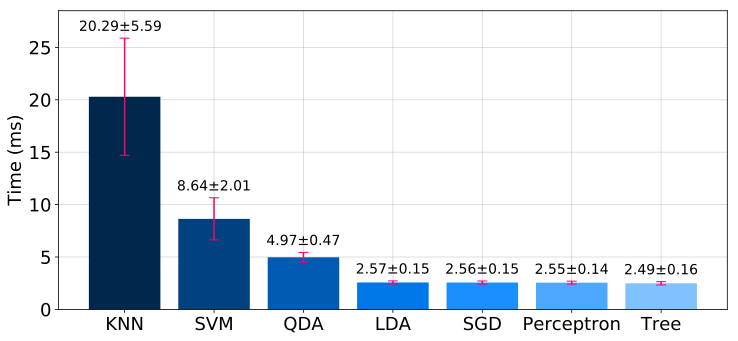

In [44]:
plt.bar(1, KNNOriginal[0]       , color="#00284d")
plt.bar(2, SVMOriginal[0]       , color="#004280")
plt.bar(3, QDAOriginal[0]       , color="#005cb3")
plt.bar(4, LDAOriginal[0]       , color="#0077e6")
plt.bar(5, SGDOriginal[0]       , color="#1a90ff")
plt.bar(6, PerceptronOriginal[0], color="#4da9ff")
plt.bar(7, TreeOriginal[0]      , color="#80c1ff")

plt.errorbar(1, KNNOriginal[0],        yerr=KNNOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(2, SVMOriginal[0],        yerr=SVMOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(3, QDAOriginal[0],        yerr=QDAOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(4, LDAOriginal[0],        yerr=LDAOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(5, SGDOriginal[0],        yerr=SGDOriginal[1],        capsize=5, color="#ff0066")
plt.errorbar(6, PerceptronOriginal[0], yerr=PerceptronOriginal[1], capsize=5, color="#ff0066")
plt.errorbar(7, TreeOriginal[0],       yerr=TreeOriginal[1],       capsize=5, color="#ff0066")

plt.text(1 - 0.511, KNNOriginal[0]+KNNOriginal[1]+0.7, str(KNNOriginal[0])+"±"+str(KNNOriginal[1]), fontsize=14)
plt.text(2 - 0.415, SVMOriginal[0]+SVMOriginal[1]+0.7, str(SVMOriginal[0])+"±"+str(SVMOriginal[1]), fontsize=14)
plt.text(3 - 0.415, QDAOriginal[0]+QDAOriginal[1]+0.7, str(QDAOriginal[0])+"±"+str(QDAOriginal[1]), fontsize=14)
plt.text(4 - 0.415, LDAOriginal[0]+LDAOriginal[1]+0.7, str(LDAOriginal[0])+"±"+str(LDAOriginal[1]), fontsize=14)
plt.text(5 - 0.415, SGDOriginal[0]+SGDOriginal[1]+0.7, str(SGDOriginal[0])+"±"+str(SGDOriginal[1]), fontsize=14)
plt.text(6 - 0.415, PerceptronOriginal[0]+PerceptronOriginal[1]+0.7, str(PerceptronOriginal[0])+"±"+str(PerceptronOriginal[1]), fontsize=14)
plt.text(7 - 0.415, TreeOriginal[0]+TreeOriginal[1]+0.7, str(TreeOriginal[0])+"±"+str(TreeOriginal[1]), fontsize=14)

#plt.title("Treino com Dataset Original")
plt.ylabel("Time (ms)")
plt.ylim(0,28.5)
plt.xticks([1,2,3,4,5,6,7],["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig("tempoClassificadoresOriginal.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Treino Aumentado

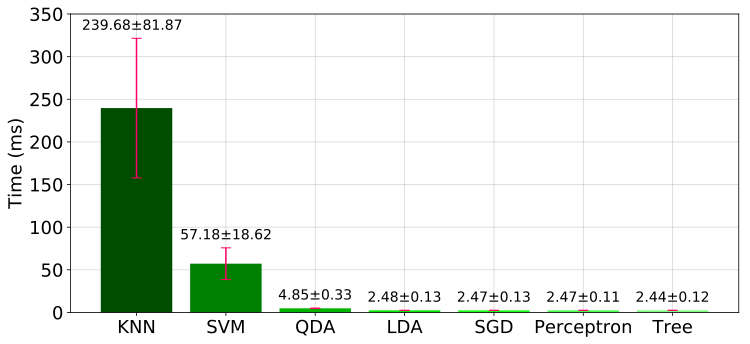

In [54]:
plt.bar(1, KNNAumentado[0]       , color="#004d00")
plt.bar(2, SVMAumentado[0]       , color="#008000")
plt.bar(3, QDAAumentado[0]       , color="#00b300")
plt.bar(4, LDAAumentado[0]       , color="#00e600")
plt.bar(5, SGDAumentado[0]       , color="#1aff1a")
plt.bar(6, PerceptronAumentado[0], color="#4dff4d")
plt.bar(7, TreeAumentado[0]      , color="#80ff80")

plt.errorbar(1, KNNAumentado[0],        yerr=KNNAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(2, SVMAumentado[0],        yerr=SVMAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(3, QDAAumentado[0],        yerr=QDAAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(4, LDAAumentado[0],        yerr=LDAAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(5, SGDAumentado[0],        yerr=SGDAumentado[1],        capsize=5, color="#ff0066")
plt.errorbar(6, PerceptronAumentado[0], yerr=PerceptronAumentado[1], capsize=5, color="#ff0066")
plt.errorbar(7, TreeAumentado[0],       yerr=TreeAumentado[1],       capsize=5, color="#ff0066")

plt.text(1 - 0.611, KNNAumentado[0]+KNNAumentado[1]+10, str(KNNAumentado[0])+"±"+str(KNNAumentado[1]), fontsize=14)
plt.text(2 - 0.511, SVMAumentado[0]+SVMAumentado[1]+10, str(SVMAumentado[0])+"±"+str(SVMAumentado[1]), fontsize=14)
plt.text(3 - 0.415, QDAAumentado[0]+QDAAumentado[1]+10, str(QDAAumentado[0])+"±"+str(QDAAumentado[1]), fontsize=14)
plt.text(4 - 0.415, LDAAumentado[0]+LDAAumentado[1]+10, str(LDAAumentado[0])+"±"+str(LDAAumentado[1]), fontsize=14)
plt.text(5 - 0.415, SGDAumentado[0]+SGDAumentado[1]+10, str(SGDAumentado[0])+"±"+str(SGDAumentado[1]), fontsize=14)
plt.text(6 - 0.415, PerceptronAumentado[0]+PerceptronAumentado[1]+10, str(PerceptronAumentado[0])+"±"+str(PerceptronAumentado[1]), fontsize=14)
plt.text(7 - 0.415, TreeAumentado[0]+TreeAumentado[1]+10, str(TreeAumentado[0])+"±"+str(TreeAumentado[1]), fontsize=14)

#plt.title("Treino com dataset Aumentado")
plt.ylabel("Time (ms)")
plt.ylim(0,350)
plt.xticks([1,2,3,4,5,6,7],["KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

plt.savefig("tempoClassificadoresAumentado.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

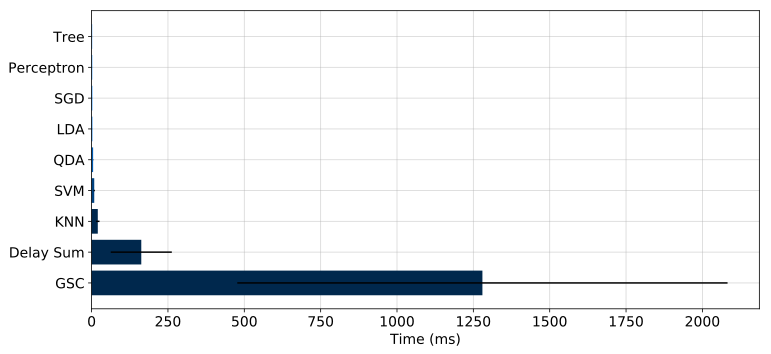

In [9]:
plt.barh(1, GSC[0], xerr=GSC[1], color="#00284d", align='center')
plt.barh(2, delaySum[0], xerr=delaySum[1], color="#00284d", align='center')
plt.barh(3, KNNOriginal[0], xerr=KNNOriginal[1], color="#00284d", align='center')
plt.barh(4, SVMOriginal[0], xerr=SVMOriginal[1], color="#004280", align='center')
plt.barh(5, QDAOriginal[0], xerr=QDAOriginal[1], color="#005cb3", align='center')
plt.barh(6, LDAOriginal[0], xerr=LDAOriginal[1], color="#0077e6", align='center')
plt.barh(7, SGDOriginal[0], xerr=SGDOriginal[1], color="#1a90ff", align='center')
plt.barh(8, PerceptronOriginal[0], xerr=PerceptronOriginal[1], color="#4da9ff", align='center')
plt.barh(9, TreeOriginal[0], xerr=TreeOriginal[1], color="#80c1ff", align='center')

# plt.text(1 + 0.03, KNNOriginal[0] + 0.4, str(KNNOriginal[0])+"±"+str(KNNOriginal[1]), fontsize=11.5)
# plt.text(2 + 0.03, SVMOriginal[0] + 0.4, str(SVMOriginal[0])+"±"+str(SVMOriginal[1]), fontsize=11.5)
# plt.text(3 + 0.03, QDAOriginal[0] + 0.4, str(QDAOriginal[0])+"±"+str(QDAOriginal[1]), fontsize=11.5)
# plt.text(4 + 0.03, LDAOriginal[0] + 0.4, str(LDAOriginal[0])+"±"+str(LDAOriginal[1]), fontsize=11.5)
# plt.text(5 + 0.03, SGDOriginal[0] + 0.4, str(SGDOriginal[0])+"±"+str(SGDOriginal[1]), fontsize=11.5)
# plt.text(6 + 0.03, PerceptronOriginal[0] + 0.4, str(PerceptronOriginal[0])+"±"+str(PerceptronOriginal[1]), fontsize=11.5)
# plt.text(7 + 0.03, TreeOriginal[0] + 0.4, str(TreeOriginal[0])+"±"+str(TreeOriginal[1]), fontsize=11.5)

#plt.title("Treino com Dataset Original")
plt.xlabel("Time (ms)")
plt.yticks([1,2,3,4,5,6,7,8,9],["GSC","Delay Sum","KNN","SVM","QDA","LDA","SGD","Perceptron","Tree"])
plt.grid(alpha=0.5)

#plt.savefig("tempoClassificadoresOriginal.pdf", format='pdf', bbox_inches = 'tight')
plt.show()